# 1. 데이터 불러오기 및 라이브러리 설치

In [1]:
## 라이브러리 설치

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import colour
from colour import Color
import missingno as msno
import json
import geopandas as gpd
import folium
import shap
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [2]:
## 데이터 불러오기

cluster=pd.read_csv('C://Users//User//Desktop//final_1031_data.csv', encoding='cp949')

In [3]:
## 필요없는 변수 제거하기

del cluster['Unnamed: 0.1']
del cluster['Unnamed: 0']
del cluster['전기차비율_s'] 
del cluster['온실가스비율_s'] 
del cluster['전기차관심도_s']

In [4]:
## 변수 이름 변경하기

cluster.columns = ['행정동코드', '시군구명', '행정동', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격', '면적',
       '평균총소득', '충전소개수', '전기차개수', '차한대당충전소대수', '전체차량개수', '전기차보급률', '전기사용량',
       '온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm', '주유소개수',
       '충전소인프라', '급속', '완속', '주유소접근성']

## 변수 순서 변경하기

cols = ['행정동코드', '시군구명', '행정동', '면적', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격',
       '평균총소득', '전체차량개수', '전기차개수','전기차보급률','충전소개수', '급속', '완속',
        '차한대당충전소대수','충전소인프라','주유소개수', '주유소접근성', '전기사용량','온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm']

cluster = cluster[cols]

# 2. VIF 제거하기

In [5]:
cluster_vif = cluster.drop(['행정동코드','시군구명','행정동','kmeans','kmedoids','hc','gmm'],axis=1)

In [6]:
def vif(x):
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = 10
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a]}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {np.round(vif[q],2)}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [7]:
vif(cluster_vif)

1번째 VIF 측정
Max VIF feature & value : 거주인구, inf
2번째 VIF 측정
Max VIF feature & value : 완속, inf
3번째 VIF 측정
Max VIF feature & value : 평균총소득, 54.52067987077843
4번째 VIF 측정
Max VIF feature & value : 거주인구, 18.806250101179153
5번째 VIF 측정
Max VIF feature & value : 전체차량개수, 14.122911261802132
6번째 VIF 측정
Max VIF feature & value : 거주인구, 12.788345391901942
7번째 VIF 측정
Max VIF feature & value : 생활인구성격, 7.689690214247064


면적의 vif는 2.92입니다.
인구밀도의 vif는 4.4입니다.
생활인구성격의 vif는 1.86입니다.
평균총소득의 vif는 6.58입니다.
전기차개수의 vif는 6.87입니다.
전기차보급률의 vif는 7.69입니다.
급속의 vif는 3.07입니다.
완속의 vif는 3.39입니다.
충전소인프라의 vif는 3.7입니다.
주유소개수의 vif는 3.69입니다.
주유소접근성의 vif는 1.93입니다.
전기사용량의 vif는 3.5입니다.
온실가스비율의 vif는 1.37입니다.


,면적,인구밀도,생활인구성격,평균총소득,전기차개수,전기차보급률,급속,완속,충전소인프라,주유소개수,주유소접근성,전기사용량,온실가스비율
0,1.34,20434.531886,0.961604,1055.6200,229,0.022376,11,111,0.030568,0,-9.344326,11781.489000,0.412222
1,0.96,33949.526515,0.799717,777.7500,124,0.012620,6,78,0.080645,3,6.579199,6942.566264,-0.053599
2,1.13,23529.283990,1.447315,720.3900,96,0.009257,1,118,0.250000,1,7.080579,13485.477306,-0.024802
3,0.40,22563.181818,1.238636,340.4100,10,0.004706,8,48,0.700000,1,7.313411,3475.635986,0.003769
4,2.52,9282.611833,3.562897,476.8200,195,0.012662,61,459,0.507692,1,4.363399,69812.024542,-0.013407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,1.05,23007.619048,0.735985,517.3600,58,0.010534,7,112,0.241379,4,4.736768,5015.702278,-0.011487
422,1.68,18906.114719,0.968832,627.2400,119,0.014265,4,152,0.176471,1,-1.577352,8815.108819,-0.050227
423,2.65,11640.358491,0.920001,777.1124,82,0.007311,4,243,0.219512,1,-4.147143,4348.407488,0.243873
424,0.54,11700.092593,0.920001,159.1676,13,0.005587,2,11,0.307692,0,-9.344326,890.637678,0.243873


In [8]:
## VIF 제거 후 결과

final_vif = cluster_vif[['면적','인구밀도','생활인구성격','평균총소득','전기차개수',
                         '전기차보급률','급속','완속','충전소인프라','주유소개수','주유소접근성',
                         '전기사용량','온실가스비율']]

In [9]:
final_vif.head(1)

,면적,인구밀도,생활인구성격,평균총소득,전기차개수,전기차보급률,급속,완속,충전소인프라,주유소개수,주유소접근성,전기사용량,온실가스비율
0,1.34,20434.531886,0.961604,1055.62,229,0.022376,11,111,0.030568,0,-9.344326,11781.489,0.412222


<AxesSubplot:>

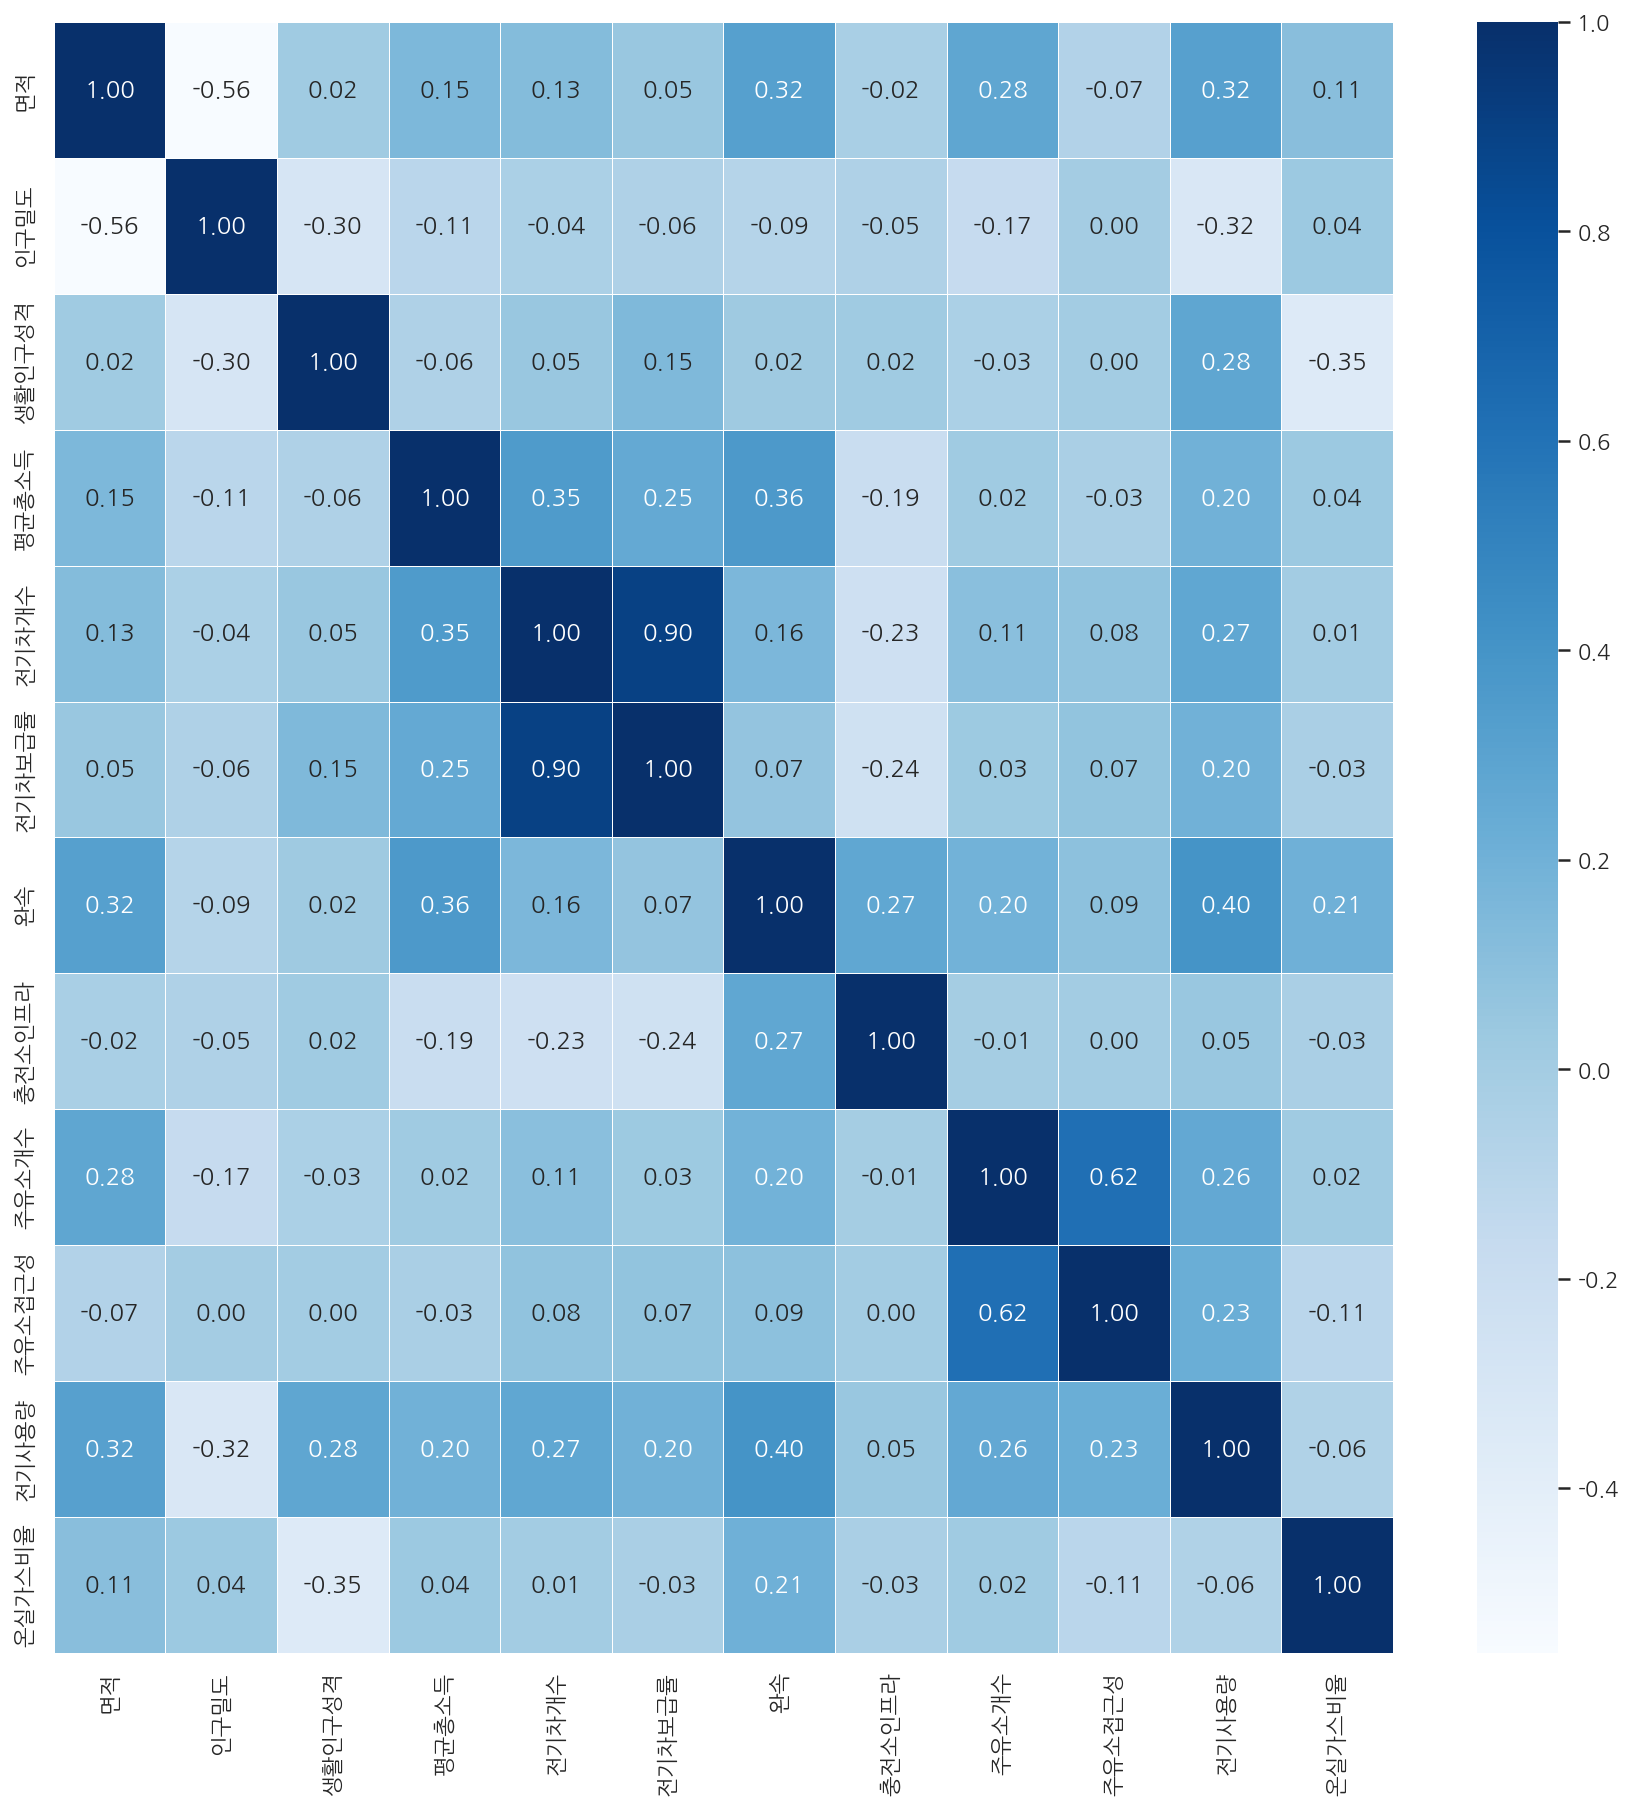

In [10]:
## Corrplot 재확인 시각화

plt.figure(figsize=(15,15))
sns.heatmap(data = final_vif.drop(['급속'],axis=1).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

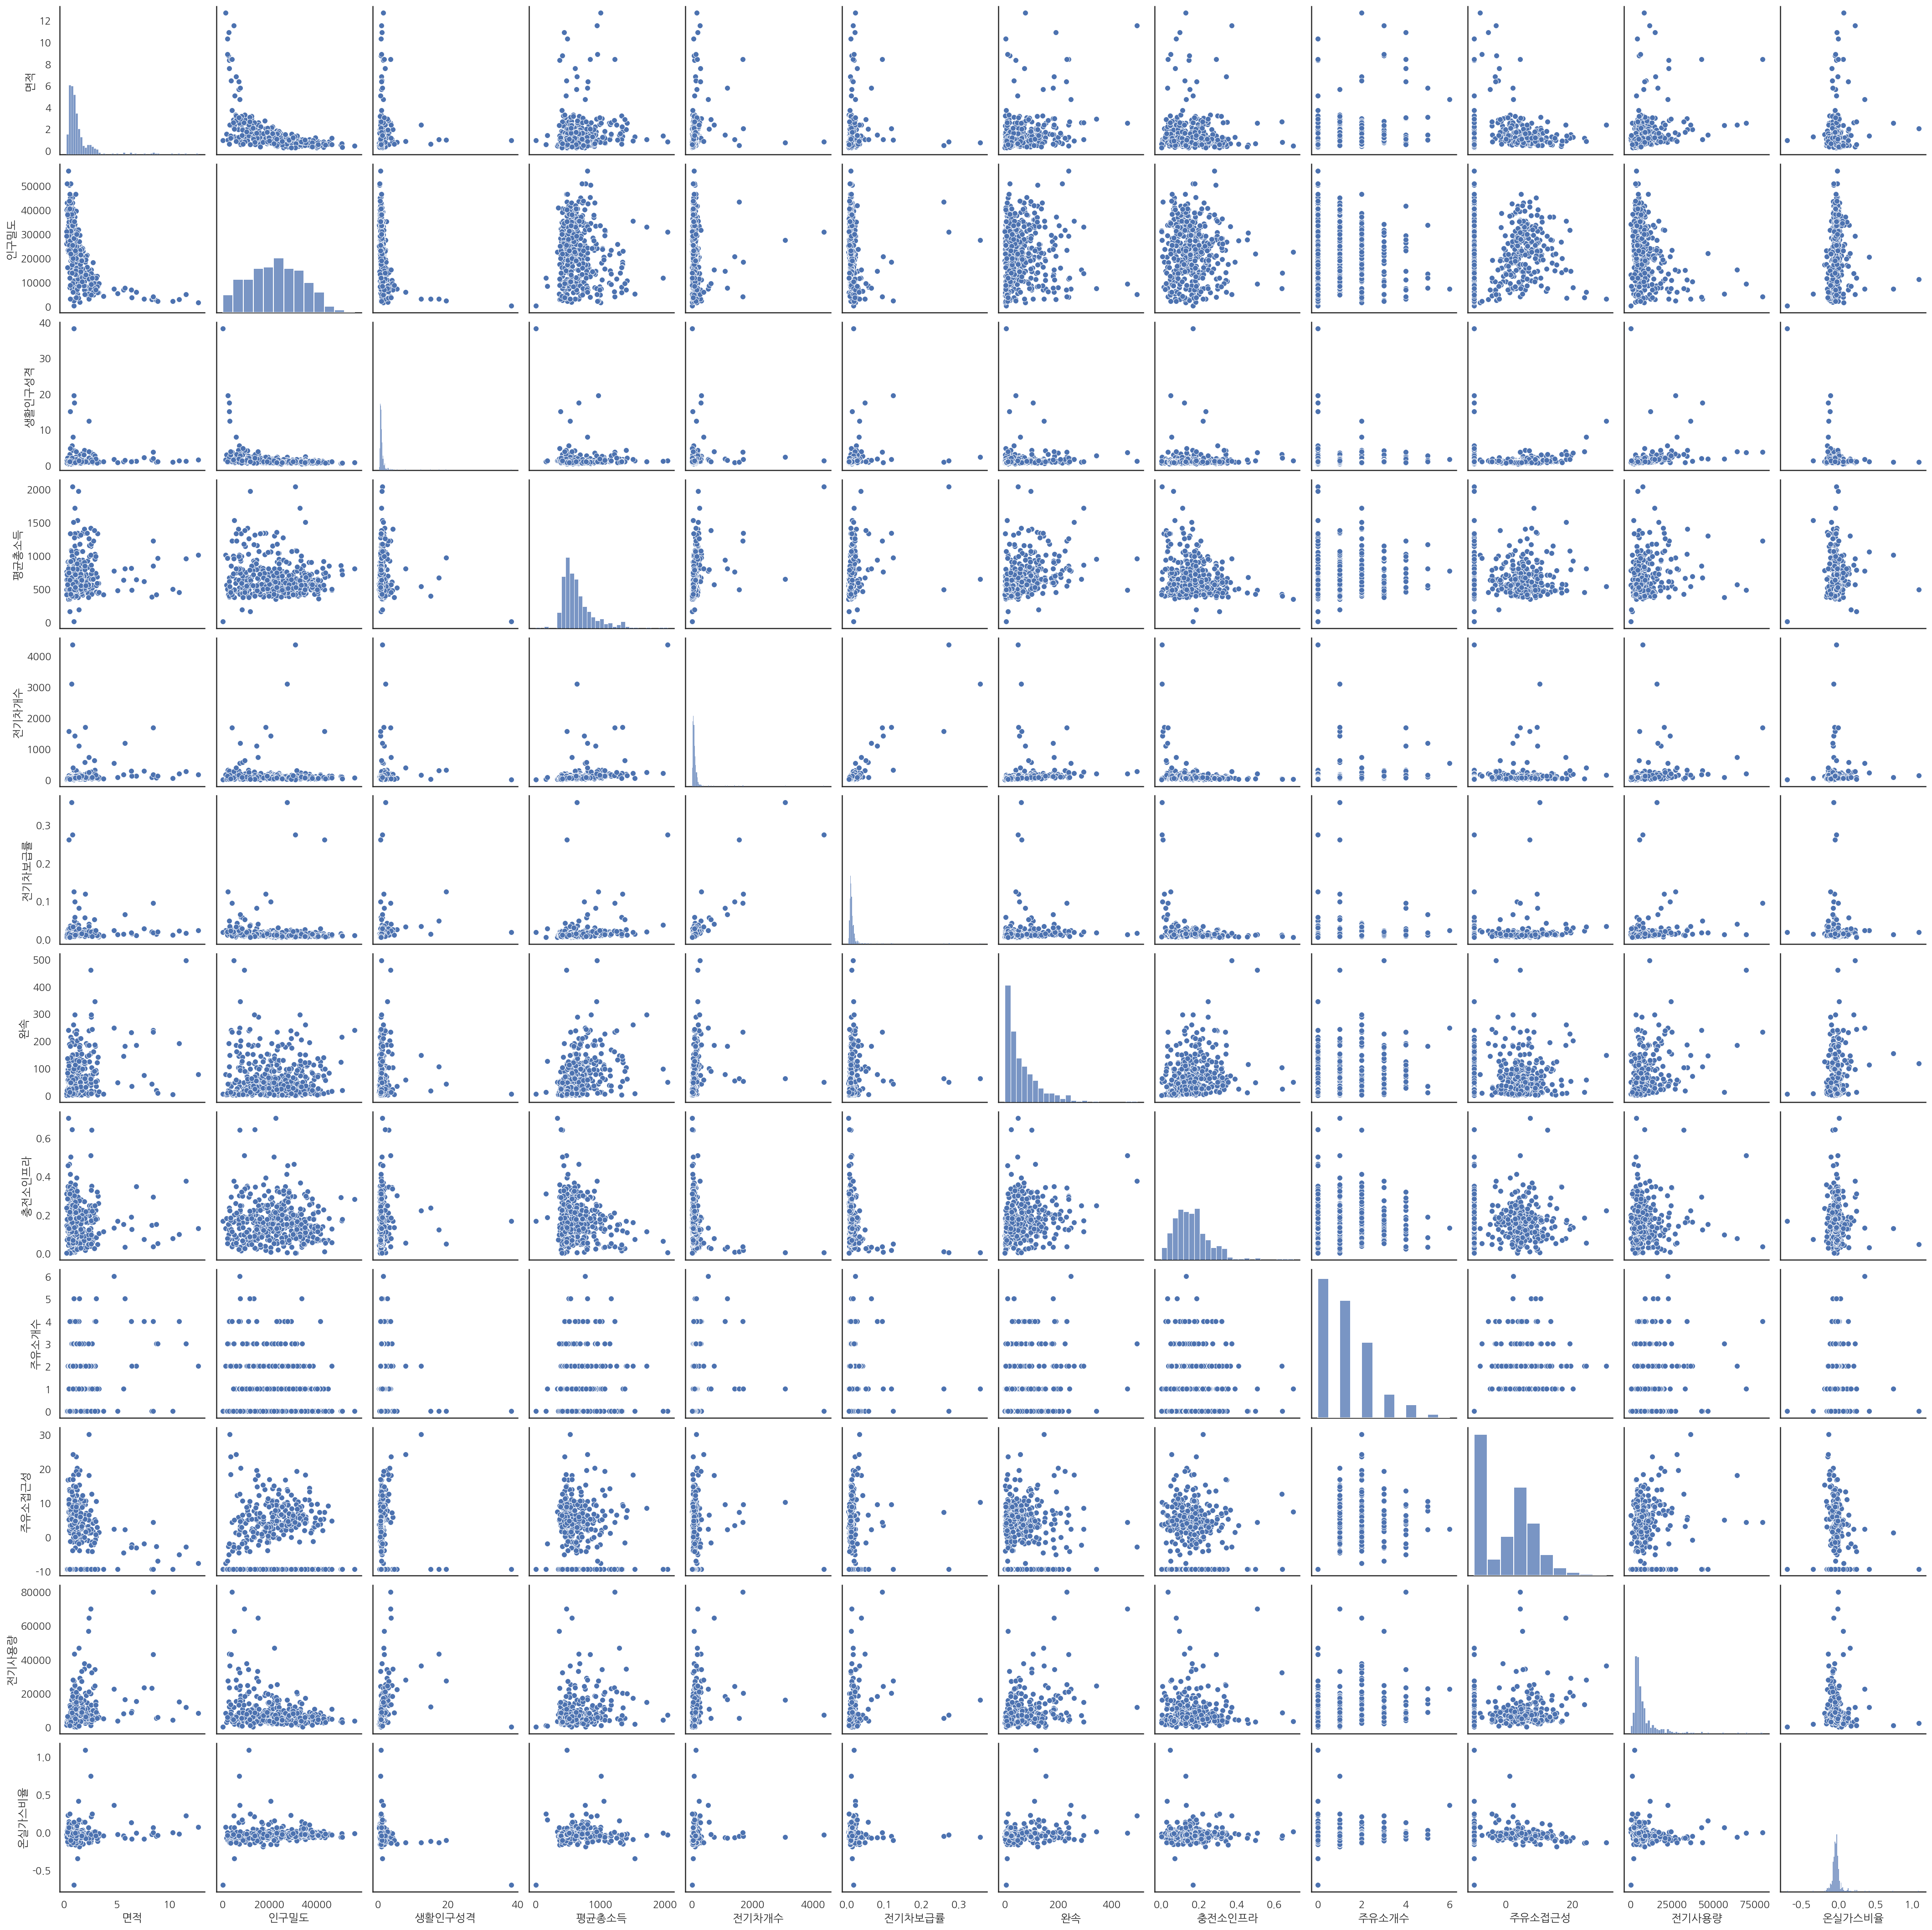

In [11]:
## Pairplot 재확인 시각화

sns.pairplot(final_vif.drop(['급속'],axis=1))

In [12]:
## 추가 변수 제거

del final_vif['전기사용량']      #클러스터링 변수로 활용
del final_vif['전기차보급률']    #전기차개수와 상관관계 높음

→ 최종적으로 급속(전기차충전소)에 영향을 미치는 중요한 변수로 전기차개수와 충전소인프라를 고려.